In [6]:
import pandas as pd
import numpy as np

In [7]:
target_url= 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'


In [110]:
import requests 
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [111]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = data.split(split_tag)
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

In [116]:
import pandas as pd

arrange_data = []
for line in data[0:]:
    line = line.replace('\n', '').split('\t')#遇\n換空白 #遇\t切割
    arrange_data.append(line)#把改完的line加回原本的arrange_data
    
df = pd.DataFrame(arrange_data)#這裡的arrange_data已更改 # 宣告 data frame
df.head(20)

0                                                  1
0    n00015388_157  http://farm1.static.flickr.com/145/430300483_2...
1    n00015388_238  http://farm2.static.flickr.com/1005/3352960681...
2    n00015388_304  http://farm1.static.flickr.com/27/51009336_a96...
3    n00015388_327  http://farm4.static.flickr.com/3025/2444687979...
4    n00015388_355  http://img100.imageshack.us/img100/3253/forres...
5    n00015388_373  http://img172.imageshack.us/img172/4606/napo03...
6    n00015388_379  http://fotootjesvanannelies.web-log.nl/olifant...
7    n00015388_388  http://www.deweekkrant.nl/images/library/pictu...
8    n00015388_442  http://www.porschemania.it/discus/messages/815...
9    n00015388_474  http://farm1.static.flickr.com/72/225029238_80...
10   n00015388_514  http://farm2.static.flickr.com/1128/1432436038...
11   n00015388_671  http://farm4.static.flickr.com/3217/2942611930...
12   n00015388_686  http://farm1.static.flickr.com/29/54608382_ee8...
13   n00015388_706  http://www.dierentuin.nl/images/jongengiraffe.jpg
14   n00015388_725  http://farm4.static.flickr.com/3279/3118047175...
15   n00015388_758  https://w3f7yg.bay.livefilestore.com/y1miLTQmc...
16   n00015388_841  http://farm4.static.flickr.com/3271/2496428562...
17   n00015388_842  http://farm2.static.flickr.com/1115/703274169_...
18  n00015388_1087  http://farm1.static.flickr.com/70/200362625_93...
19  n00015388_1145  http://farm1.static.flickr.com/180/370761991_7...

In [76]:
print(df.loc[1])

0                                        n00015388_238
1    http://farm2.static.flickr.com/1005/3352960681...
Name: 1, dtype: object


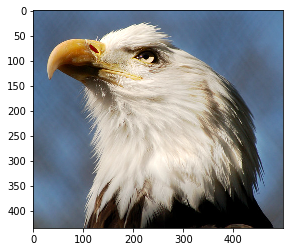

In [66]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0,1]

response = requests.get(first_link)

# Convert img to numpy array
img = np.array(Image.open(BytesIO(response.content)))

plt.imshow(img)
plt.show()

In [124]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list =[]
    for line in url_list:
        response = requests.get(line)
        img=np.array(Image.open(BytesIO(response.content)))
        img_list.append(img)
    return img_list

Total images that we got: 4 


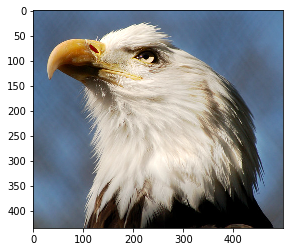

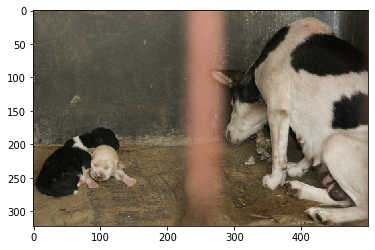

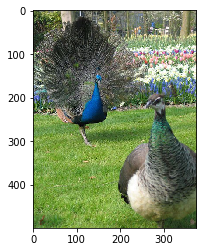

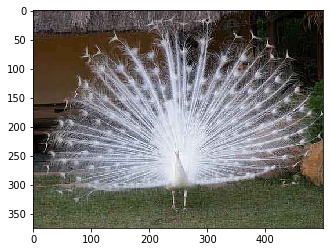

In [127]:
result = img2arr_fromURLs(df[0:4][1].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()